# Variable Clustering in Python

### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets, cluster

### Import historical macroeconomic variable numbers 

In [2]:
macrovar = pd.read_excel('/Users/ili/Desktop/macrovars_bl.xlsx')

### Create variable transformations: Lag 1 quarter and 2 quarters 

In [3]:
lag1= macrovar.drop('DATE', axis=1).shift(1)
lag2= lag1.add_suffix('_L1')
lag2= macrovar.drop('DATE', axis=1).shift(2)
lag2= lag2.add_suffix('_L2')

In [4]:
macrovar2 = pd.concat([macrovar, lag1, lag2], axis=1)

###  Create variable transformations: Quarter over quarter percent change

In [5]:
macrovar3= macrovar2.drop('DATE', axis=1).pct_change()
macrovar3= macrovar3.add_suffix('_pct')

### Drop NaN records to fit the models 

In [6]:
macrovar3.dropna(inplace=True)

### Use seaborn heatmap to check for missing value distributions 

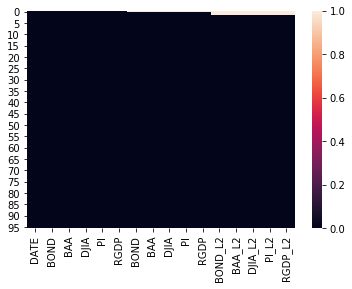

In [7]:
sns.heatmap(macrovar2.isnull())

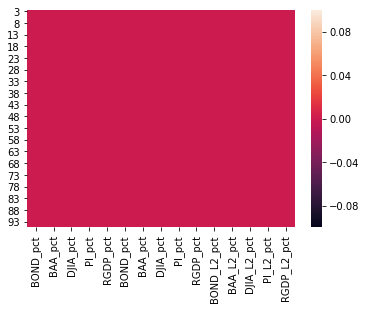

In [8]:
sns.heatmap(macrovar3.isnull())

### Use Sklearn.preprocessing.StandardScaler to scale input data. Scaling the data before clustering analysis is important when using distance as the measurement. 

In [9]:
scaler = StandardScaler() 
macrovar4= scaler.fit_transform(macrovar3)

## Method 1: FeatureAgglomeration from sklearn.cluster 

### Here we use 5 clusters and single linkage as an example for FeatureAgglomeration

In [10]:
agglo = cluster.FeatureAgglomeration(n_clusters=5,  linkage='single')

In [11]:
agglo.fit(macrovar4)

FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
                     connectivity=None, distance_threshold=None,
                     linkage='single', memory=None, n_clusters=5,
                     pooling_func=<function mean at 0x000002BC19B970D0>)

In [12]:
X_reduced = agglo.transform(macrovar4)

### After applying FeatureAgglomeration, the output has 93 rows and changed from 15 columns to 5 columns. 

In [13]:
macrovar4.shape

(93, 15)

In [14]:
X_reduced.shape

(93, 5)

### We can use labels_ to identify the cluster assignment. 

In [15]:
agglo.labels_

array([2, 2, 1, 0, 1, 3, 3, 0, 0, 0, 4, 4, 0, 0, 0], dtype=int64)

In [16]:
for i, label in enumerate(set(agglo.labels_)):
    features_with_label = [j for j, lab in enumerate(agglo.labels_) if lab == label]
    print('Features in agglomeration {}: {}'.format(i, features_with_label))

Features in agglomeration 0: [3, 7, 8, 9, 12, 13, 14]
Features in agglomeration 1: [2, 4]
Features in agglomeration 2: [0, 1]
Features in agglomeration 3: [5, 6]
Features in agglomeration 4: [10, 11]


In [17]:
macrovar3.head(5)

,BOND_pct,BAA_pct,DJIA_pct,PI_pct,RGDP_pct,BOND_pct,BAA_pct,DJIA_pct,PI_pct,RGDP_pct,BOND_L2_pct,BAA_L2_pct,DJIA_L2_pct,PI_L2_pct,RGDP_L2_pct
3,-0.054160,-0.026458,-0.105591,0.036044,0.006229,-0.047696,-0.046418,-0.000380,0.105947,0.001336,-0.043754,0.021136,-0.047403,-0.009908,0.018312
4,-0.094597,-0.078364,-0.125661,-0.006516,-0.002852,-0.054160,-0.026458,-0.105591,0.036044,0.006229,-0.047696,-0.046418,-0.000380,0.105947,0.001336
5,0.045995,0.022044,0.071511,-0.006502,0.005846,-0.094597,-0.078364,-0.125661,-0.006516,-0.002852,-0.054160,-0.026458,-0.105591,0.036044,0.006229
6,-0.053071,-0.035014,-0.161671,0.011427,-0.004150,0.045995,0.022044,0.071511,-0.006502,0.005846,-0.094597,-0.078364,-0.125661,-0.006516,-0.002852
7,-0.046837,-0.015239,0.119705,-0.033066,0.002724,-0.053071,-0.035014,-0.161671,0.011427,-0.004150,0.045995,0.022044,0.071511,-0.006502,0.005846


In [18]:
X_reduced = pd.DataFrame(X_reduced)

In [19]:
X_reduced.head(5)

,0,1,2,3,4
0,0.532723,-0.673896,-0.415962,-0.499231,-0.070619
1,0.106249,-1.696713,-0.918315,-0.408680,-0.496992
2,-0.722084,0.465289,0.343753,-0.910354,-0.406453
3,-0.487108,-2.063176,-0.462674,0.350106,-0.907868
4,-0.720557,0.479711,-0.313989,-0.455317,0.351845


### Putting the two datasets above side by side, we can see that the values of each cluster is the combined effects from all the variables assigned to that cluster. If there is only one variables in that cluster, then the cluster value equals to the input macroeconomic variable value. 

## Method 2:  VarClusHi from PyPI. Developed to be the substitute for Proc Varclus in SAS

In [20]:
from varclushi import VarClusHi

In [21]:
macrovar5= pd.DataFrame(macrovar4)

In [22]:
macrovar5.shape

(93, 15)

In [23]:
macrovar3.columns

Index(['BOND_pct', 'BAA_pct', 'DJIA_pct', 'PI_pct', 'RGDP_pct', 'BOND_pct',
       'BAA_pct', 'DJIA_pct', 'PI_pct', 'RGDP_pct', 'BOND_L2_pct',
       'BAA_L2_pct', 'DJIA_L2_pct', 'PI_L2_pct', 'RGDP_L2_pct'],
      dtype='object')

In [24]:
macrovar5.shape

(93, 15)

In [25]:
VC = VarClusHi(macrovar5,maxeigval2=1,maxclus=5)
VC.varclus()

In [26]:
VC.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,5,2.452375,0.928056,0.490475
1,1,4,1.804009,0.992024,0.451002
2,2,3,1.721946,0.919959,0.573982
3,3,3,1.374127,0.926001,0.458042


### Call rsquare, you can get the (1 - rsquare) ratio of each variable 

In [27]:
VC.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0.0,3.0,0.602211,0.035230,0.412315
1,0.0,8.0,0.565818,0.004236,0.436030
2,0.0,9.0,0.384610,0.124141,0.702613
3,0.0,13.0,0.279898,0.000173,0.720227
4,0.0,14.0,0.619840,0.109525,0.426918
5,1.0,0.0,0.381109,0.113412,0.698059
6,1.0,2.0,0.484587,0.021985,0.526999
7,1.0,4.0,0.615697,0.121006,0.437208
8,1.0,7.0,0.322615,0.029322,0.697846
9,2.0,10.0,0.768862,0.052971,0.244066


### RS_Own is R-square value of each variable with its own cluster and RS_NC is the R-square value with its nearest cluster. The R-square value for a variable with the nearest cluster should be low if the clusters are well separated. The last column displays the ratio of (1-RS_Own)/(1-RS_NC) for each variable. Small values of this ratio indicate good clustering.